In [1]:
# Importing essential packages used in this Project
import pandas as pd # import pandas for analyzing data
import numpy as np # import numpy for facilitating the process of calculation
import seaborn as sns # import seaborn for beautifing well-defined graph
import matplotlib.pyplot as plt # import matplotlib.pyplot for devising graph
from sklearn.linear_model import LinearRegression # import LinearRegression for drawing the line into the graph

In [2]:
# Loading all datasets downloaded from platform
df_ankara_data = pd.read_csv("city_data_ankara.csv")
df_ankara_data_information = pd.read_csv("city_list_ankara_turkey.csv")
df_global_data = pd.read_csv("global_data.csv")

In [4]:
# Exloring df_ankara_data dataset 
df_ankara_data.head(15)

,year,city,country,avg_temp
0,1755,Ankara,Turkey,9.62
1,1756,Ankara,Turkey,10.99
2,1757,Ankara,Turkey,10.82
3,1758,Ankara,Turkey,8.33
4,1759,Ankara,Turkey,9.93
5,1760,Ankara,Turkey,9.28
6,1761,Ankara,Turkey,NaN
7,1762,Ankara,Turkey,NaN
8,1763,Ankara,Turkey,NaN
9,1764,Ankara,Turkey,NaN


In [5]:
# Exloring df_ankara_data_information dataset 
df_ankara_data_information.head(1)

,city,country
0,Ankara,Turkey


In [6]:
# Exloring df_global_data dataset 
df_global_data.head(15)

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
5,1755,8.36
6,1756,8.85
7,1757,9.02
8,1758,6.74
9,1759,7.99


In [7]:
#Elimainate cells with no data in df_ankara_data
df_ankara_data_complete = df_ankara_data.dropna()

In [8]:
# Exloring df_ankara_data_complete dataset 
df_ankara_data_complete.head(15)

,year,city,country,avg_temp
0,1755,Ankara,Turkey,9.62
1,1756,Ankara,Turkey,10.99
2,1757,Ankara,Turkey,10.82
3,1758,Ankara,Turkey,8.33
4,1759,Ankara,Turkey,9.93
5,1760,Ankara,Turkey,9.28
19,1774,Ankara,Turkey,11.01
20,1775,Ankara,Turkey,11.22
21,1776,Ankara,Turkey,10.10
22,1777,Ankara,Turkey,10.08


In [15]:
# disable chained assignments
pd.options.mode.chained_assignment = None 

# Calculate moving averages by using rolling()
df_ankara_data_complete["ankara_moving_avg"] = df_ankara_data_complete["avg_temp"].rolling(window=10).mean()
df_global_data["global_moving_avg"] = df_global_data["avg_temp"].rolling(window=10).mean()


In [48]:
# Combining columns to create a new DataFrame
df = pd.DataFrame({'year': df_ankara_data_complete["year"], 
                   'ankara_moving_avg': df_ankara_data_complete["ankara_moving_avg"], 
                   'global_moving_avg': df_global_data["global_moving_avg"],
                  })
# Elimainate cells with no data in df
df = df.dropna()
# Show df
print(df)

       year  ankara_moving_avg  global_moving_avg
22   1777.0             10.138              7.898
23   1778.0             10.250              7.970
24   1779.0             10.233              8.007
25   1780.0             10.248              8.100
26   1781.0             10.462              8.089
27   1782.0             10.465              8.093
28   1783.0             10.539              8.269
29   1784.0             10.469              8.398
30   1785.0             10.298              8.572
31   1786.0             10.298              8.597
32   1787.0             10.335              8.568
33   1788.0             10.309              8.514
34   1789.0             10.288              8.423
35   1790.0             10.228              8.241
36   1791.0             10.268              8.237
37   1792.0             10.298              8.214
38   1793.0             10.311              8.205
39   1794.0             10.345              8.140
40   1795.0             10.452              7.995


In [49]:
# Thanks to melt(), we can reshape the data into a more computer-friendly form using Pandas in Python
df_melt = pd.melt(df,
            id_vars=["year"],
            value_vars=["ankara_moving_avg", "global_moving_avg"],
            value_name="observation")

# Show df_melt
print(df_melt)

       year           variable  observation
0    1777.0  ankara_moving_avg       10.138
1    1778.0  ankara_moving_avg       10.250
2    1779.0  ankara_moving_avg       10.233
3    1780.0  ankara_moving_avg       10.248
4    1781.0  ankara_moving_avg       10.462
5    1782.0  ankara_moving_avg       10.465
6    1783.0  ankara_moving_avg       10.539
7    1784.0  ankara_moving_avg       10.469
8    1785.0  ankara_moving_avg       10.298
9    1786.0  ankara_moving_avg       10.298
10   1787.0  ankara_moving_avg       10.335
11   1788.0  ankara_moving_avg       10.309
12   1789.0  ankara_moving_avg       10.288
13   1790.0  ankara_moving_avg       10.228
14   1791.0  ankara_moving_avg       10.268
15   1792.0  ankara_moving_avg       10.298
16   1793.0  ankara_moving_avg       10.311
17   1794.0  ankara_moving_avg       10.345
18   1795.0  ankara_moving_avg       10.452
19   1796.0  ankara_moving_avg       10.487
20   1797.0  ankara_moving_avg       10.538
21   1798.0  ankara_moving_avg  

[Text(0, 0.5, 'Temperature in C'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Global and Ankara temperatures')]

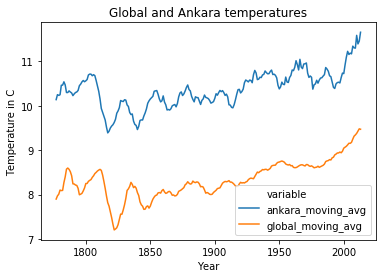

In [50]:
p = sns.lineplot(data=df_melt.query('variable == "ankara_moving_avg" or variable == "global_moving_avg"')
                 ,x="year"
                 ,y="observation"
                 ,hue="variable")
p.set(xlabel='Year', ylabel='Temperature in C',title='Global and Ankara temperatures')